In [2]:
import networkx as nx
import xml.etree.ElementTree as ET
import sys
import itertools
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import girvan_newman, modularity
import community as community_louvain
from community import modularity
from community import community_louvain
import networkx.algorithms.community as nx_comm
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms import degree_centrality
from networkx.algorithms import eigenvector_centrality
from networkx.algorithms import betweenness_centrality
from networkx.algorithms import closeness_centrality
from pyvis.network import Network
from pprint import pprint as pp
import pandas as pd
import seaborn as sns
import numpy as np
from itertools import count
import os
tree = ET.parse('trading_floor.xml')
root = tree.getroot()


In [3]:
G = nx.Graph()


In [4]:
for node in root:
    if(node.tag. split("}")[1]== "graph"):
        for n in node:
            if(n.tag.split("}")[1] == "node") :
                nodeId= n.attrib.get("id")
                ls = []
                for child in n:
                    ls.append(child.text)
                if (nodeId not in G.nodes) :
                    G. add_node (nodeId, d0=ls[0],d1=ls[1],d2=ls[2])
                    posi = {}
                    ai={}
                for n in G.nodes:
                    key = n
                    posi[key] = int(G.nodes[n]['d1']), int(G.nodes[n]['d2'])
                    ai[key] = int(G.nodes[n]['d0'])

            elif(n.tag. split("}")[1] =="edge"):
                source =n.attrib.get ("source" )
                target =n.attrib.get("target")
                if G.has_edge (source, target) :
                    print ("edge already exits")
                else:
                    G.add_edge (source, target)


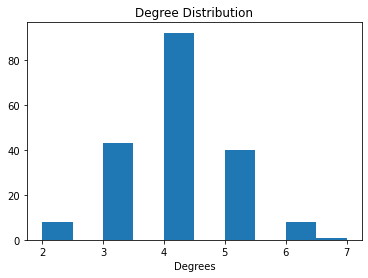

In [5]:
degrees = [G.degree(n) for n in G.nodes()]
deg =np.array(degrees)
fig, ax = plt.subplots()
ax.set_xlabel("Degrees")
ax.set_title("Degree Distribution")
plt.hist(degrees)
plt.show()

In [6]:
opinion = list(ai.values())
opinion = np.array(opinion)

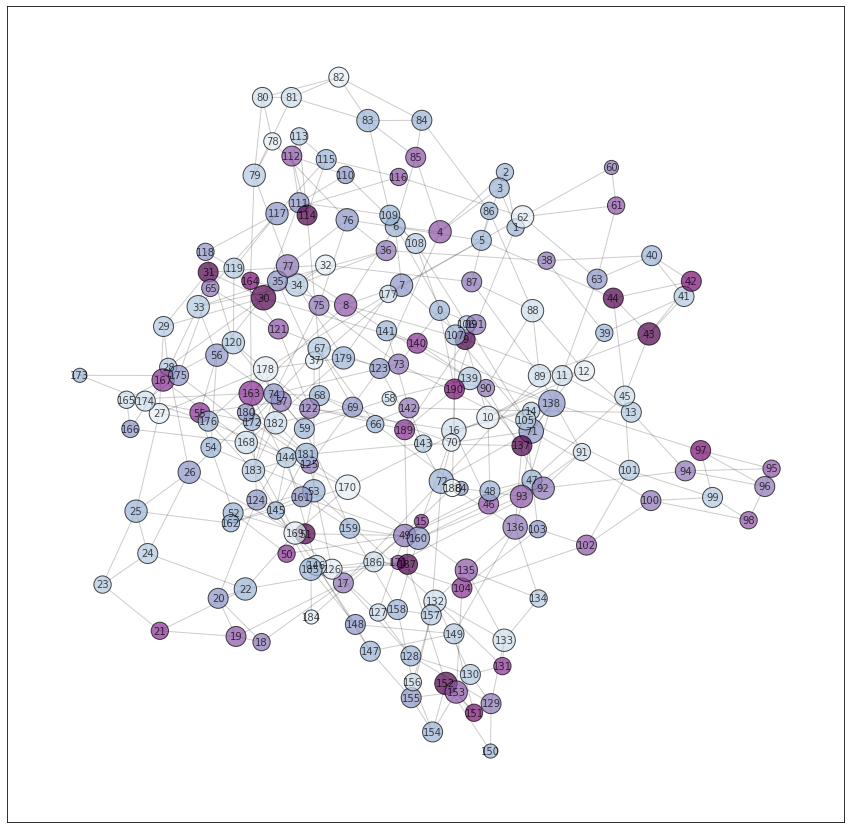

In [7]:
nds=G.nodes
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)
iegde = nx.draw_networkx_edges(G, pos, alpha=0.2)
inode = nx.draw_networkx_nodes(G, pos, alpha=0.7, nodelist=nds,
                               node_color=opinion, node_size=deg*100, cmap="BuPu", edgecolors='k')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='k', font_family='sans-serif', font_weight='normal',alpha=0.7, bbox=None, horizontalalignment='center', verticalalignment='center', ax=None, clip_on=True)
plt.show()


'Graph with 192 nodes and 384 edges'


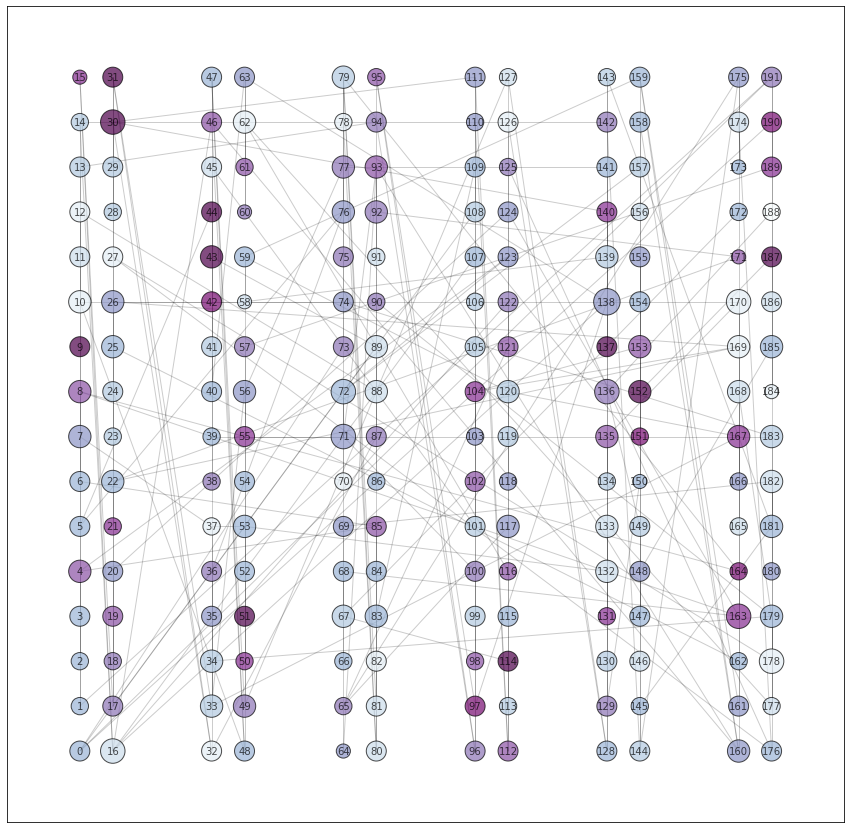

In [8]:
pp(nx.info(G))
plt.figure(figsize=(15, 15))
iegde = nx.draw_networkx_edges(G, posi, alpha=0.2)
inode = nx.draw_networkx_nodes(G, posi, alpha=0.7, nodelist=nds,
                               node_color=opinion, node_size=deg*100, cmap="BuPu", edgecolors='k')
nx.draw_networkx_labels(G, posi, font_size=10, font_color='k', font_family='sans-serif', font_weight='normal',
                        alpha=0.7, bbox=None, horizontalalignment='center', verticalalignment='center', ax=None, clip_on=True)
plt.show()


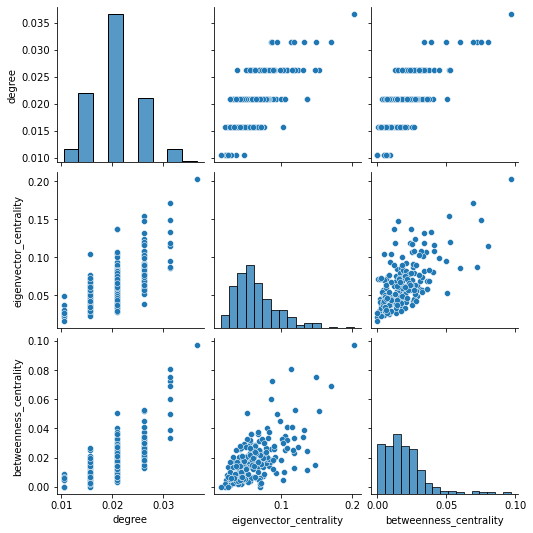

In [16]:
degree = degree_centrality(G)

ec = eigenvector_centrality(G)
enc = list(ec.values())
enc = np.array(enc)

cc = closeness_centrality(G)
clc = list(cc.values())
clc = np.array(clc)

bc = betweenness_centrality(G)
bwc = list(bc.values())
bwc = np.array(bwc)

df = pd.DataFrame({'degree': degree, 'eigenvector_centrality': ec,
                   'betweenness_centrality': bc})
df.corr()
sns.pairplot(df)

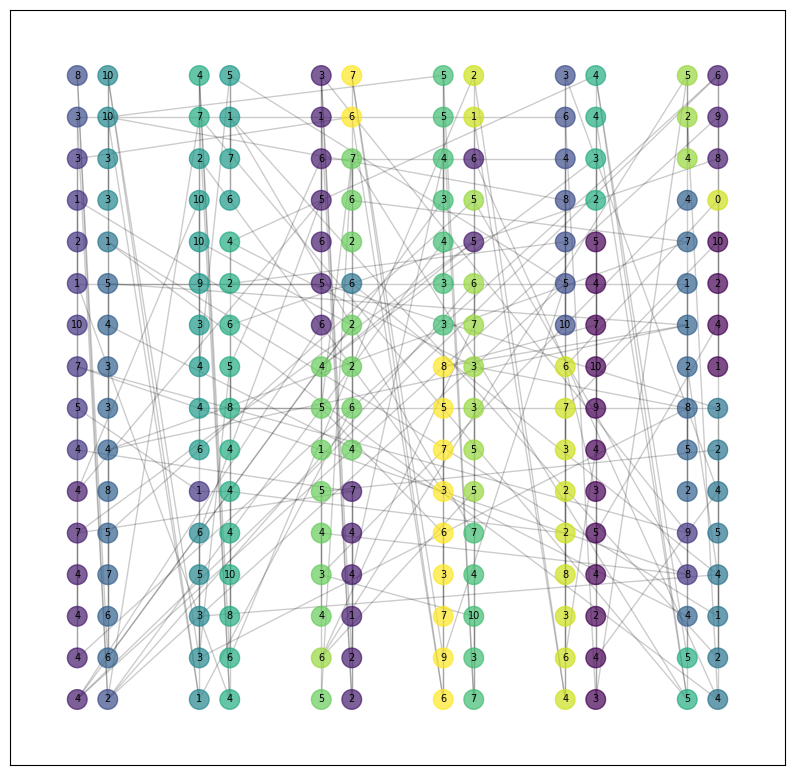

In [15]:
partition_best = community_louvain.best_partition(G, resolution=1)
plt.figure(figsize=(10, 10),dpi = 100)
cmap = cm.get_cmap('viridis', max(partition_best.values()) + 1)
nx.draw_networkx_nodes(G, posi, partition_best.keys(), node_size=200,
                       cmap=cmap,alpha=0.7, node_color=list(partition_best.values()))
nx.draw_networkx_edges(G, posi, alpha=0.2)
nx.draw_networkx_labels(G,posi,labels=ai,font_size=7)
plt.show()


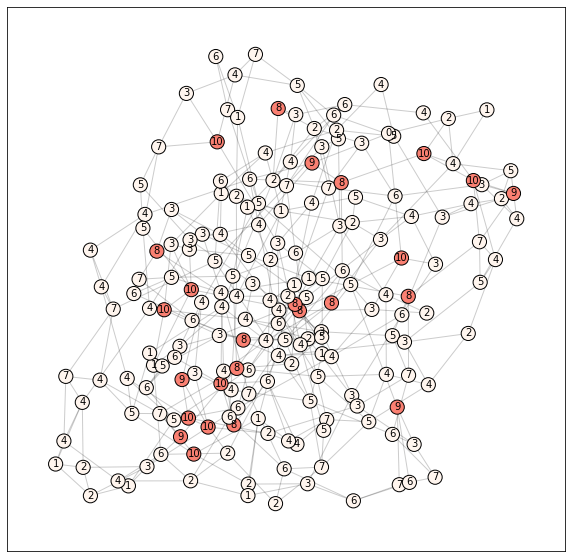

['9',
 '15',
 '21',
 '30',
 '31',
 '42',
 '43',
 '44',
 '50',
 '51',
 '55',
 '97',
 '104',
 '114',
 '131',
 '137',
 '140',
 '151',
 '152',
 '163',
 '164',
 '167',
 '187',
 '189',
 '190']

In [20]:
# Diffusion with Early Adopters
a = 1.5
b = 1
degree = nx.degree(G)
adopters = []
for node in G.nodes:
    G.nodes[node]["adopting"] = 0

early_adopters = []
for node in G.nodes:
    if int(G.nodes[node]['d0']) >= 8:
        early_adopters.append(node)

adopters.extend(early_adopters)

for adopter in adopters:
    G.nodes[adopter]['adopting'] = 1

colors = []
for n in G.nodes():
    if G.nodes[n]['adopting'] == 1:
        colors.append('salmon')
    else:
        colors.append('seashell')
plt.figure(figsize=(10, 10))
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, alpha=1, nodelist=nds,
                       node_color=colors, node_size=200, edgecolors='k')
nx.draw_networkx_labels(G, pos, labels=ai, font_size=10, font_color='k', font_family='sans-serif', font_weight='normal',
                        bbox=None, horizontalalignment='center', verticalalignment='center', ax=None, clip_on=True)
plt.show()
early_adopters

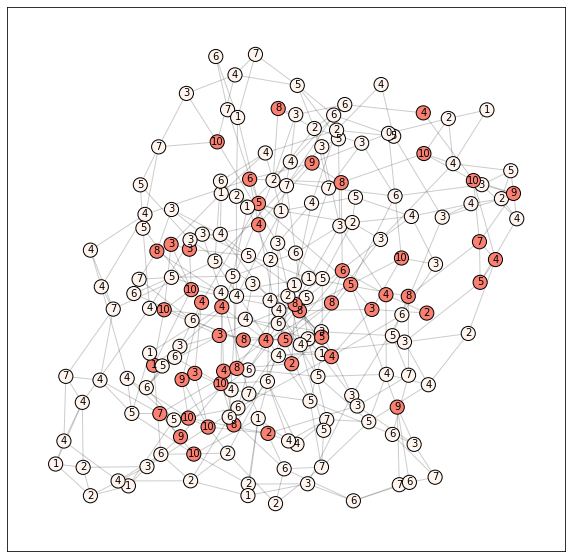

Number of Early Adopters :  25
Number of Adopters After Cascading :  87


['9',
 '15',
 '21',
 '30',
 '31',
 '42',
 '43',
 '44',
 '50',
 '51',
 '55',
 '97',
 '104',
 '114',
 '131',
 '137',
 '140',
 '151',
 '152',
 '163',
 '164',
 '167',
 '187',
 '189',
 '190',
 '8',
 '2',
 '9',
 '3',
 '2',
 '4',
 '1',
 '4',
 '5',
 '5',
 '2',
 '5',
 '4',
 '5',
 '7',
 '1',
 '3',
 '8',
 '1',
 '3',
 '9',
 '1',
 '4',
 '1',
 '1',
 '5',
 '0',
 '1',
 '5',
 '3',
 '1',
 '5',
 '4',
 '1',
 '5',
 '5',
 '1',
 '6',
 '5',
 '1',
 '6',
 '6',
 '1',
 '9',
 '1',
 '0',
 '2',
 '8',
 '4',
 '0',
 '5',
 '3',
 '5',
 '6',
 '5',
 '8',
 '5',
 '9',
 '6',
 '3',
 '3',
 '3']

In [21]:
z = len(early_adopters)
for z in range(z):
    for focal in G.nodes:

        focal_nbrs = list(G.neighbors(focal))
        p = np.sum([G.nodes[nbr]['adopting'] for nbr in focal_nbrs])

        d = G.degree(focal)
        a_payoff = p * a
        b_payoff = (d - p) * b

        if (G.nodes[focal]['adopting'] == 0) & (a_payoff > b_payoff):
            G.nodes[focal]['adopting'] = 1
            adopters.extend(focal)
        else:
            pass
adopters

colors = []
for n in G.nodes():
    if G.nodes[n]['adopting'] == 1:
        colors.append('salmon')
    else:
        colors.append('seashell')
plt.figure(figsize=(10,10))       
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, alpha=1,nodelist=nds,node_color=colors, node_size=200,edgecolors='k')
nx.draw_networkx_labels(G, pos, labels=ai,font_size=10, font_color='k', font_family='sans-serif', font_weight='normal', bbox=None, horizontalalignment='center', verticalalignment='center', ax=None, clip_on=True)
plt.show()

print("Number of Early Adopters : ", len(early_adopters))
early_adopters
print("Number of Adopters After Cascading : ", len(adopters))
adopters


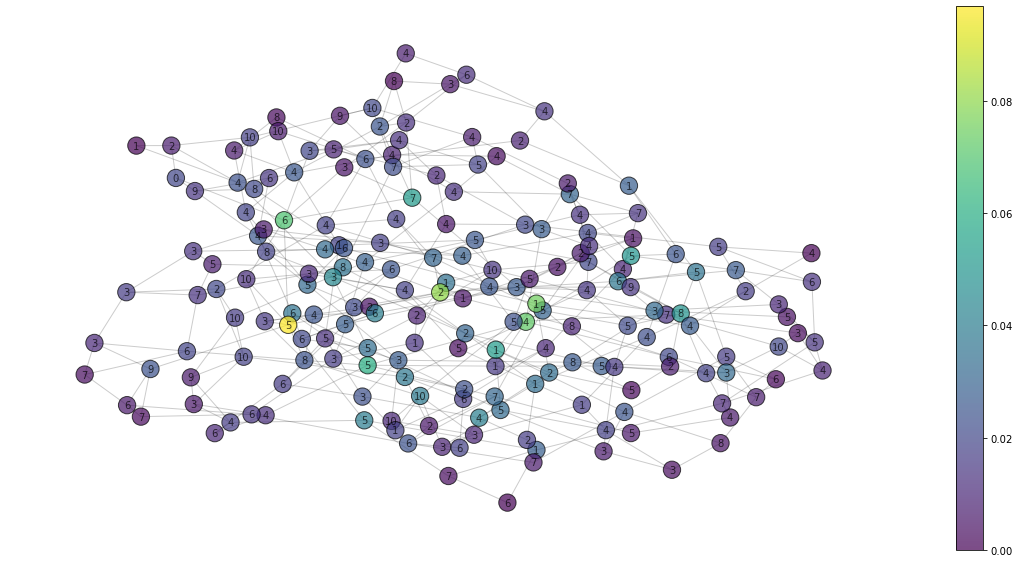

In [ ]:
plt.figure(figsize=(20,10))
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos,alpha=0.7,nodelist=nds,node_color=bwc,node_size=300, cmap="viridis",edgecolors='k')
nx.draw_networkx_labels(G, pos, labels=ai, font_size=10, font_color='k', font_family='sans-serif', font_weight='normal',
                     alpha=0.7, bbox=None, horizontalalignment='center', verticalalignment='center', ax=None, clip_on=True)
plt.colorbar(nc)
plt.axis('off')
plt.show()

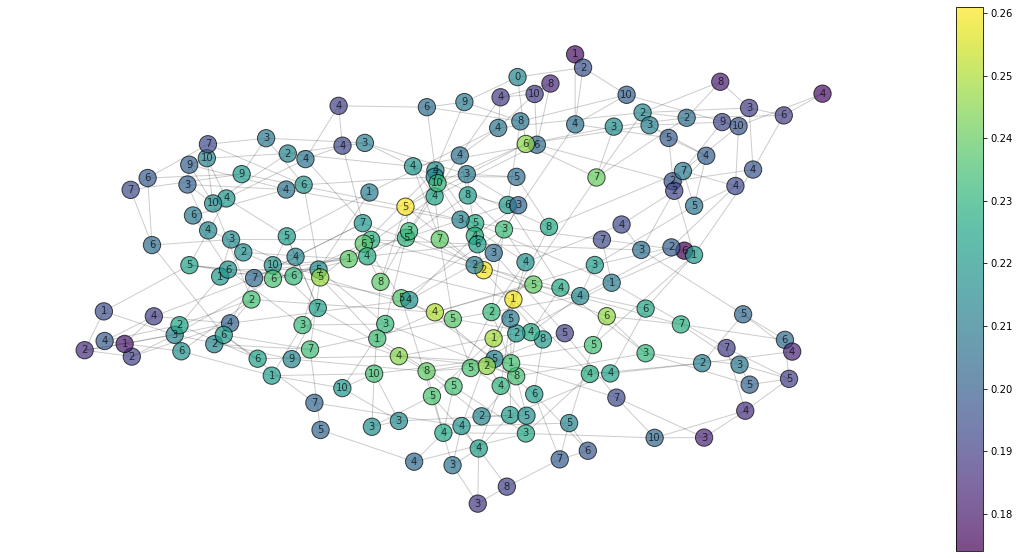

In [17]:

plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(
    G, pos, alpha=0.7, nodelist=nds, node_color=clc, node_size=300, cmap="viridis",edgecolors='k')
nx.draw_networkx_labels(G, pos, labels=ai, font_size=10, font_color='k', font_family='sans-serif', font_weight='normal',
                        alpha=0.7, bbox=None, horizontalalignment='center', verticalalignment='center', ax=None, clip_on=True)
plt.colorbar(nc)
plt.axis('off')
plt.show()


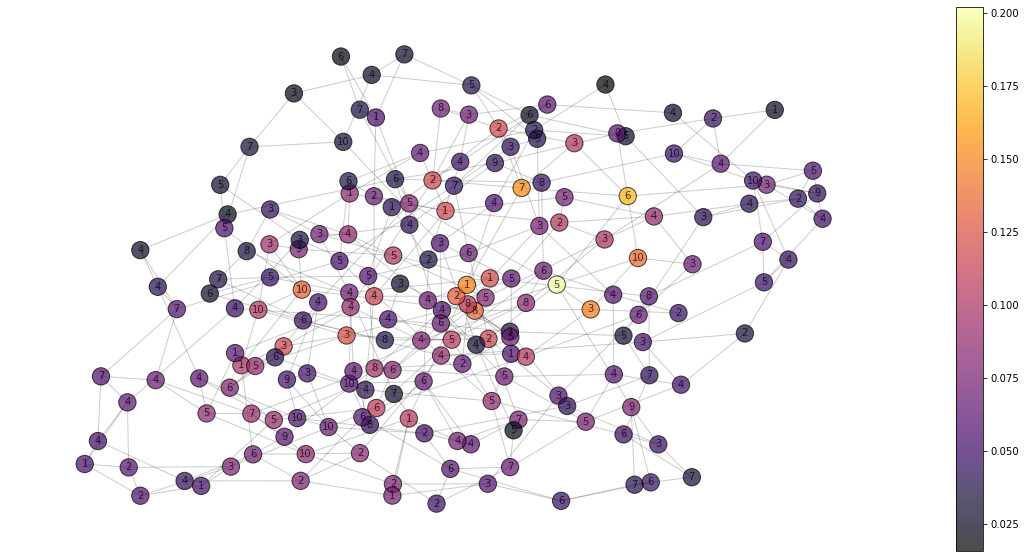

In [19]:

plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(
    G, pos, alpha=0.7, nodelist=nds, node_color=enc, node_size=300, cmap="inferno", edgecolors='k')
nx.draw_networkx_labels(G, pos, labels=ai, font_size=10, font_color='k', font_family='sans-serif', font_weight='normal',
                        alpha=0.7, bbox=None, horizontalalignment='center', verticalalignment='center', ax=None, clip_on=True)
plt.colorbar(nc)
plt.axis('off')
plt.show()
